# Figure S1d-g

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

import replay_structure.structure_models as models
import replay_structure.metadata as meta 
import replay_structure.read_write as read_write

import importlib

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
hse_data = dict()
hse_results = dict()
hse_random_effects_results = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
hse_max_ll_results = np.zeros((meta.N_SESSIONS, meta.N_MODELS))

for i, session in enumerate(meta.Session_List):
    hse_data[str(session)] = read_write.load_spikemat_data(
        session, meta.HighSynchronyEvents_Data.default_time_window_ms, meta.HighSynchronyEvents_Data.name)
    hse_results[str(session)] = read_write.load_model_comparison_results(
        session, meta.HighSynchronyEvents_Data.default_time_window_ms, meta.HighSynchronyEvents_Data.name, meta.HighSynchronyEvents_Data.default_likelihood_function)
    hse_random_effects_results[i] = hse_results[str(session)].random_effects_results["p_models"]
    hse_max_ll_results[i] = hse_results[str(session)].max_ll_counts[meta.MODELS_AS_STR]/hse_results[str(session)].max_ll_counts.sum()

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/high_synchrony_events/rat1day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/high_synchrony_events/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/high_synchrony_events/rat1day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/high_synchrony_events/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/high_synchrony_events/rat2day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/high_synchrony_events/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/high_synchrony_events/rat2day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/high_synchrony_events/rat2da

In [4]:
swr_data = dict()
swr_results = dict()
swr_random_effects_results = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
swr_max_ll_results = np.zeros((meta.N_SESSIONS, meta.N_MODELS))

for i, session in enumerate(meta.Session_List):
    swr_data[str(session)] = read_write.load_spikemat_data(session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name)
    swr_results[str(session)] = read_write.load_model_comparison_results(
        session, meta.Ripple_Data.default_time_window_ms, meta.Ripple_Data.name, meta.Ripple_Data.default_likelihood_function)
    swr_random_effects_results[i] = swr_results[str(session)].random_effects_results["p_models"]
    swr_max_ll_results[i] = swr_results[str(session)].max_ll_counts[meta.MODELS_AS_STR]/swr_results[str(session)].max_ll_counts.sum()

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat1day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day1_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ripples/rat2day2_4cm_3ms.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final

In [5]:
data_types_list = [meta.Ripple_Data, 
                   meta.HighSynchronyEvents_Data, 
                  ]
time_window_ms = 3
ripple_mc_results = dict()
random_effects_results = dict()
max_ll_results = dict()
deviance_explained = dict()

for data_type in data_types_list:
    random_effects_results[str(data_type.name)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    ripple_mc_results[str(data_type.name)] = dict()
    max_ll_results[str(data_type.name)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    deviance_explained[str(data_type.name)] = dict()
    for i, session in enumerate(meta.Session_List):
        ripple_mc_results[str(data_type.name)][str(session)] = read_write.load_model_comparison_results(session, time_window_ms, data_type.name, data_type.default_likelihood_function, ext='')
        random_effects_results[str(data_type.name)][i] = ripple_mc_results[str(data_type.name)][str(session)].random_effects_results["p_models"]
        max_ll = ripple_mc_results[str(data_type.name)][str(session)].results_dataframe["mll_model"].value_counts()
        for model in meta.MODELS_AS_STR:
            if model not in max_ll:
                max_ll[model] = 0
        max_ll_results[str(data_type.name)][i] = max_ll[meta.MODELS_AS_STR]/np.sum(max_ll)
        deviance_explained[str(data_type.name)][str(session)] = read_write.load_deviance_explained_results(
            session, data_type.default_time_window_ms, data_type.name, data_type.default_likelihood_function, ext='')

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day1_4cm_3ms_poisson_deviance_explained.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat1day2_4cm_3ms_poisson_deviance_explained.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day1_4cm_3ms_poisson_deviance_explained.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/rat2day2_4cm_3ms_poisson_model_comparison.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/results_final/ripples/

In [6]:
all_deviance_explained = dict()
deviance_explained_x_best_fit = dict()
deviance_explained_x_random = dict()
deviance_explained_y = dict()

for data_type in data_types_list:
    all_deviance_explained[str(data_type.name)] = deviance_explained[str(data_type.name)]['rat1day1'].results
    for session in meta.Session_List:
        all_deviance_explained[str(data_type.name)] = all_deviance_explained[str(data_type.name)].append(deviance_explained[str(data_type.name)][str(session)].results)

    all_deviance_explained[str(data_type.name)] = all_deviance_explained[str(data_type.name)][~np.any(np.isnan(all_deviance_explained[str(data_type.name)]), axis=1)]
    total_SWRs_with_popburst = len(all_deviance_explained[str(data_type.name)])

    deviance_explained_x_best_fit[str(data_type.name)] = np.sort(all_deviance_explained[str(data_type.name)].max(axis=1))
    deviance_explained_x_random[str(data_type.name)] = np.sort(all_deviance_explained[str(data_type.name)]['random'])
    deviance_explained_y[str(data_type.name)] = np.arange(total_SWRs_with_popburst)/total_SWRs_with_popburst
    


In [7]:
# get overlap between SWRs and HSEs 
swr_overlap_dict = dict()
for session in meta.Session_List:
    swr_starts = swr_data[str(session)].data['ripple_times_s'][:,0]
    swr_ends = swr_data[str(session)].data['ripple_times_s'][:,1]

    hse_starts = hse_data[str(session)].spikemat_info['popburst_times_s'][:,0]
    hse_ends = hse_data[str(session)].spikemat_info['popburst_times_s'][:,1]

    swr_overlap = np.full(len(hse_starts), np.nan)

    for i, (hse_start, hse_end) in enumerate(zip(hse_starts, hse_ends)):
        next_swr_end_bool = np.argwhere(hse_start < swr_ends)
        if len(next_swr_end_bool) > 0 :
            next_swr_end_ind = next_swr_end_bool[0][0]
            if hse_end < swr_starts[next_swr_end_ind]:
                swr_overlap[i] = 0
            else:
                swr_overlap[i] = 1
        else:
            swr_overlap[i] = 0
    swr_overlap_dict[str(session)] = swr_overlap


<ipython-input-7-473db558624c>:14: RuntimeWarning: invalid value encountered in less
  next_swr_end_bool = np.argwhere(hse_start < swr_ends)


In [8]:
mll_with_overlap = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
mll_without_overlap = np.zeros((meta.N_SESSIONS, meta.N_MODELS))

for i, session in enumerate(meta.Session_List):
    
    mc_session_counts = hse_results[str(session)].results_dataframe['mll_model'][swr_overlap_dict[str(session)]==1].value_counts()
    for model in meta.MODELS_AS_STR:
        if model not in mc_session_counts:
            mc_session_counts[model] = 0      
    mll_with_overlap[i] = mc_session_counts[meta.MODELS_AS_STR]/mc_session_counts.sum()
    
    mc_session_counts = hse_results[str(session)].results_dataframe['mll_model'][swr_overlap_dict[str(session)]==0].value_counts()
    for model in meta.MODELS_AS_STR:
        if model not in mc_session_counts:
            mc_session_counts[model] = 0 
    mll_without_overlap[i] = mc_session_counts[meta.MODELS_AS_STR]/mc_session_counts.sum()

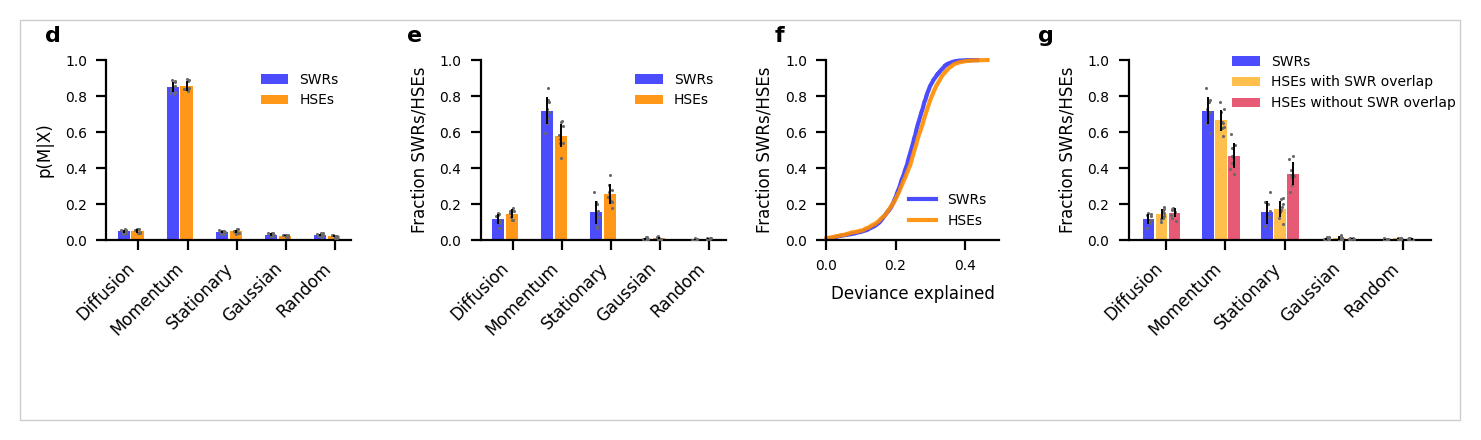

In [10]:
figure_width = 7.2
figure_height = 2


margin = 0.06
header_height = 0.1
footer_height = 0.45

w_spacing = 0.09

panel1_width = .17
panel2_width = .17
panel3_width = .12#.2
panel4_width = .21

panel_height = 1 - header_height - footer_height

panel1_left = margin
panel2_left = margin + panel1_width + w_spacing
panel3_left = margin + panel1_width + panel2_width + 2*w_spacing - .02
panel4_left = margin + panel1_width + panel2_width + panel3_width + 3*w_spacing - .02

panel_bottom = footer_height

fig = plt.figure(
    figsize=(figure_width, figure_height), dpi=200, facecolor="w", edgecolor="k"
)
ax = dict()
ax[0] = fig.add_axes([panel1_left, panel_bottom, panel1_width, panel_height])
ax[1] = fig.add_axes([panel2_left, panel_bottom, panel2_width, panel_height])
ax[2] = fig.add_axes([panel3_left, panel_bottom, panel3_width, panel_height])
ax[3] = fig.add_axes([panel4_left, panel_bottom, panel4_width, panel_height])


colors = ["blue", "darkorange"]
alphas = [0.7, 0.9]
legend_names = ["SWRs", "HSEs", "Simulated"]
model_names_dict = {'diffusion': 'Diffusion', 
               'momentum': 'Momentum', 
               'stationary': 'Stationary', 
               'stationary_gaussian': 'Gaussian', 
               'random': 'Random'}
model_names = [model_names_dict[model] for model in meta.MODELS_AS_STR]

j = 0
for i, data_type in enumerate(data_types_list):
    p_models_mean = np.mean(random_effects_results[str(data_type.name)], axis=0)
    p_models_sd = np.std(random_effects_results[str(data_type.name)], axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.28*i, p_models_mean, yerr=p_models_sd,
            width=.25, label=legend_names[i], color=colors[i], alpha=alphas[i], error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.28*i+(np.random.rand()-.5)/8, random_effects_results[str(data_type.name)][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
    ax[j].set_ylabel("p(M|X)")
    ax[j].legend(frameon=False, fontsize=5)
    
    

j = 1
for i, data_type in enumerate(data_types_list):
    p_models_mean = np.mean(max_ll_results[str(data_type.name)], axis=0)
    p_models_sd = np.std(max_ll_results[str(data_type.name)], axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.28*i, p_models_mean, yerr=p_models_sd,
            width=.25, label=legend_names[i], color=colors[i], alpha=alphas[i], error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.28*i+(np.random.rand()-.5)/8, max_ll_results[str(data_type.name)][s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
    ax[j].set_ylabel("Fraction SWRs/HSEs")

for j in range(2):
    ax[j].set_xticks(np.arange(meta.N_MODELS)+.3)
    ax[j].set_ylim([0,1])
    ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)

    ax[j].legend(frameon=False, fontsize=5)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    
j = 2
ax[j].spines["right"].set_visible(False)
ax[j].spines["top"].set_visible(False)
ax[j].tick_params(axis='both')
ax[j].set_ylabel("Fraction SWRs/HSEs")
ax[j].set_xlabel("Deviance explained")
ax[j].set_ylim([0,1])
ax[j].set_xlim([0,.5])

for i, data_type in enumerate(data_types_list):
    ax[j].plot(deviance_explained_x_best_fit[str(data_type.name)][deviance_explained_x_best_fit[str(data_type.name)] >0], 
               deviance_explained_y[str(data_type.name)][deviance_explained_x_best_fit[str(data_type.name)] >0], 
               color=colors[i], alpha=alphas[i], label=legend_names[i], clip_on=False)
ax[j].legend(frameon=False, fontsize=5, loc=0)
    
# MLL split by SWR overlap
j = 3
legend_labels = ['SWRs', 'HSEs with SWR overlap', "HSEs without SWR overlap"]
colors = ['blue', 'orange', 'crimson']
for i, mll_results in enumerate([max_ll_results['ripples'], mll_with_overlap, mll_without_overlap]):
    p_models_mean = np.mean(mll_results, axis=0)
    p_models_sd = np.std(mll_results, axis=0)
    ax[j].bar(np.arange(meta.N_MODELS)+.22*i, p_models_mean, yerr=p_models_sd,
            width=.2, label=legend_labels[i], color=colors[i], alpha=.7, error_kw=dict(lw=.7, zorder=101))
    for s in range(meta.N_SESSIONS):
        ax[j].scatter(np.arange(meta.N_MODELS)+.22*i+(np.random.rand()-.5)/8, mll_results[s], s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
ax[j].set_ylabel("Fraction SWRs/HSEs")
    
ax[j].set_xticks(np.arange(meta.N_MODELS)+.3)
ax[j].set_ylim([0,1])
ax[j].set_xticklabels(model_names, rotation=45, ha='right', fontsize=6)
ax[j].set_ylabel("Fraction SWRs/HSEs")
ax[j].legend(frameon=False, fontsize=5, bbox_to_anchor=(.3,1.1,0,0))
ax[j].spines['top'].set_visible(False)
ax[j].spines['right'].set_visible(False)
    
ax[0].text(-.25,1.1, 'd', size=8, transform=ax[0].transAxes, fontweight='bold')
ax[1].text(-.3,1.1, 'e', size=8, transform=ax[1].transAxes, fontweight='bold')
ax[2].text(-.3,1.1, 'f', size=8, transform=ax[2].transAxes, fontweight='bold')
ax[3].text(-.3,1.1, 'g', size=8, transform=ax[3].transAxes, fontweight='bold')

plt.savefig(os.path.join(meta.FIGURES_PATH, "FigureS1d-g.svg"), dpi=500, transparent=True)



rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

In [11]:
p_exceedance = dict()
for data_type in data_types_list:
    print(data_type.name)
    p_exceedance[str(data_type)] = np.zeros((meta.N_SESSIONS, meta.N_MODELS))
    for i, session in enumerate(meta.Session_List):
        p_exceedance[str(data_type)][i] = ripple_mc_results[str(data_type.name)][str(session)].random_effects_results["p_exceedance"].round(2)
    for j, model in enumerate(meta.MODELS_AS_STR):
        print(f"model {model}: {p_exceedance[str(data_type)].mean(axis=0)[j]} +/- {p_exceedance[str(data_type)].std(axis=0)[j]}")

ripples
model diffusion: 0.0 +/- 0.0
model momentum: 1.0 +/- 0.0
model stationary: 0.0 +/- 0.0
model stationary_gaussian: 0.0 +/- 0.0
model random: 0.0 +/- 0.0
high_synchrony_events
model diffusion: 0.0 +/- 0.0
model momentum: 1.0 +/- 0.0
model stationary: 0.0 +/- 0.0
model stationary_gaussian: 0.0 +/- 0.0
model random: 0.0 +/- 0.0


In [12]:
swr_overlap_percent = np.array([swr_overlap_dict[str(session)].mean() for session in meta.Session_List])
print(swr_overlap_percent.mean()*100, np.std(swr_overlap_percent)*100)

54.33714921927086 10.36099045827353
